<a href="https://colab.research.google.com/github/golden7187/customer_review_sentiment_analysis/blob/main/CUSTOMER_review_sentiment_analysis_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Overview of data**

In [ ]:
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [ ]:
df = df.rename(columns = {'Review Text' : 'text', 'recommended_ind' : 'recommended',
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division',
                          'department_name' : 'department', 'class_name' :'class'})

In [ ]:
df.drop(['unnamed:_0', 'clothing_id'], axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             23486 non-null  int64 
 1   title           19676 non-null  object
 2   review_text     22641 non-null  object
 3   rating          23486 non-null  int64 
 4   recommended     23486 non-null  int64 
 5   feedback_count  23486 non-null  int64 
 6   division        23472 non-null  object
 7   department      23472 non-null  object
 8   class           23472 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,age,rating,recommended,feedback_count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [ ]:
df.head()

,age,title,review_text,rating,recommended,feedback_count,division,department,class
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**2.Checking missing value**

In [ ]:
df.isnull().sum()

,0
age,0
title,3810
review_text,845
rating,0
recommended,0
feedback_count,0
division,14
department,14
class,14


In [ ]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
print("\nMissing Values in Each Column:")
print(missing_df)


Missing Values in Each Column:
                Missing Values  Percentage
age                          0    0.000000
title                     3810   16.222430
review_text                845    3.597888
rating                       0    0.000000
recommended                  0    0.000000
feedback_count               0    0.000000
division                    14    0.059610
department                  14    0.059610
class                       14    0.059610


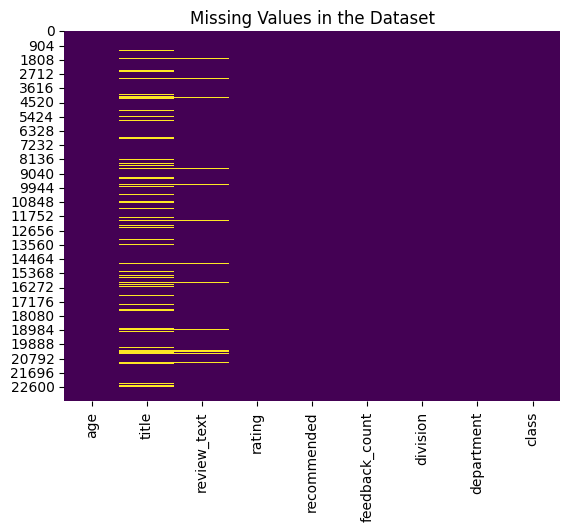

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

In [ ]:
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
    print('New shape after missing value control:', df.shape)

In [ ]:
drop_null(df, 90)

Shape: (23486, 9)
New shape after missing value control: (23486, 9)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
recommended,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
feedback_count,23486.0,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0


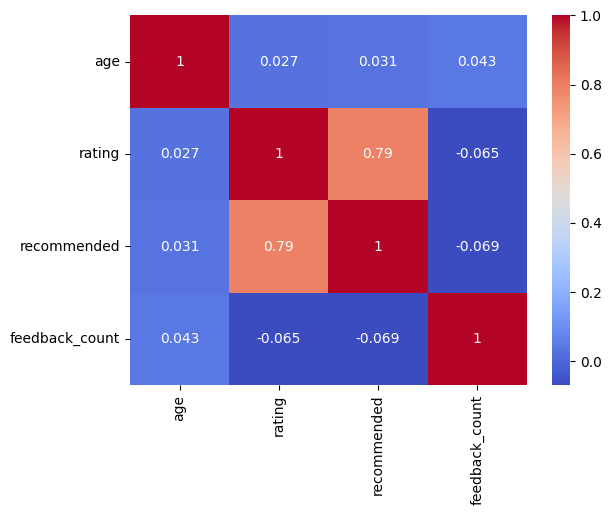

In [ ]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

**3. Analysis based on age**

In [ ]:
df.age.describe().T

,age
count,23486.000000
mean,43.198544
std,12.279544
min,18.000000
25%,34.000000
50%,41.000000
75%,52.000000
max,99.000000


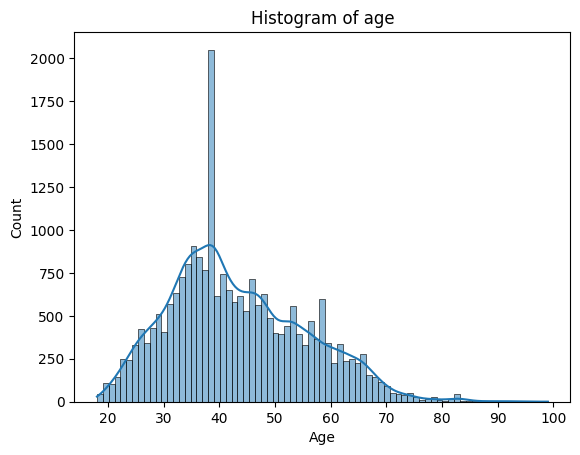

In [ ]:
sns.histplot(df['age'], bins = 77,  kde=True)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of age')
plt.show()

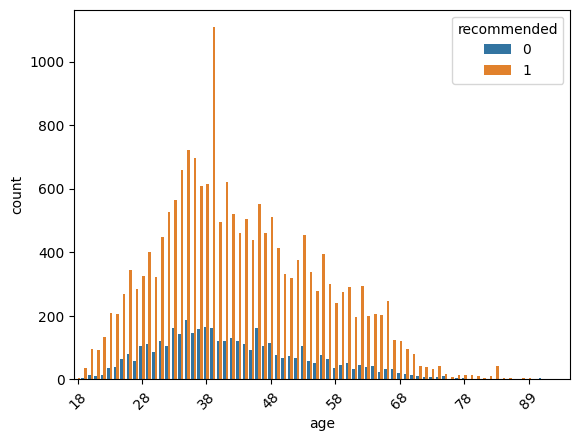

In [ ]:
# Create the countplot
sns.countplot(data=df, x="age", hue="recommended")

# Show every 5th label on the x-axis
plt.xticks(np.arange(0, len(df["age"].unique()), step=10), rotation=45)

# Display the plot
plt.show()

**4.Analysis based on rating**

In [ ]:
df.rating.describe().T

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<ipython-input-22-aee667594c7c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


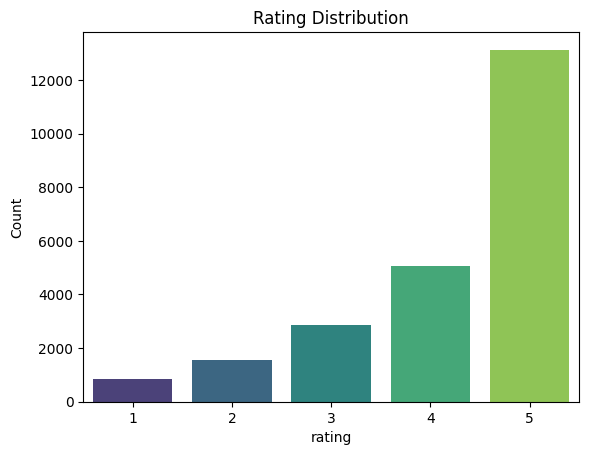

In [ ]:
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

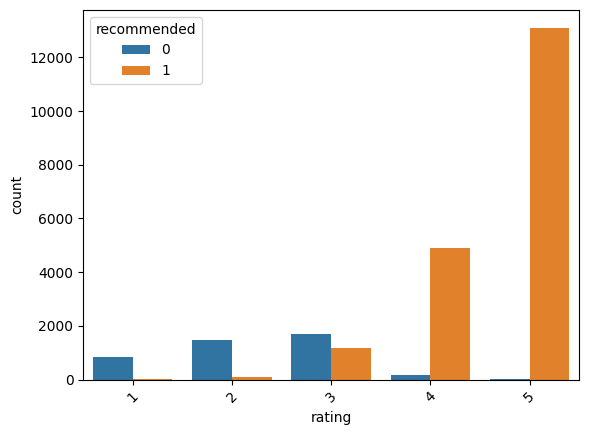

In [ ]:
# Create the countplot
sns.countplot(data=df, x="rating", hue="recommended")

# Show every 5th label on the x-axis
plt.xticks(np.arange(0, len(df["rating"].unique())), rotation=45)

# Display the plot
plt.show()

**5. Analysis based on recommended**

In [ ]:
df.recommended.describe().T

,recommended
count,23486.000000
mean,0.822362
std,0.382216
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


<ipython-input-25-73f2011300d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='recommended', palette='viridis')


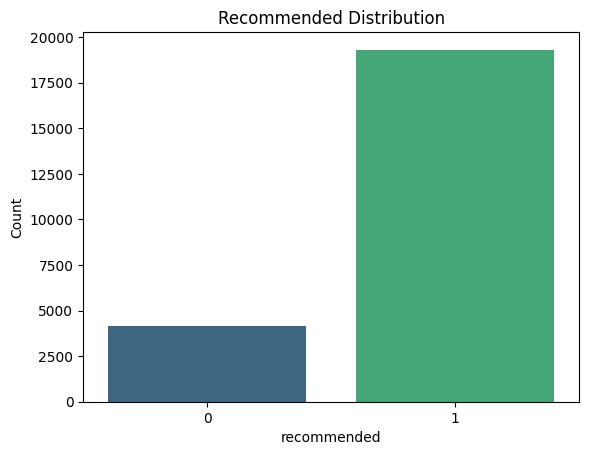

In [ ]:
sns.countplot(data=df, x='recommended', palette='viridis')
plt.title('Recommended Distribution')
plt.xlabel('recommended')
plt.ylabel('Count')
plt.show()

**6. Analysis Based on recommended**

In [ ]:
df.feedback_count.describe().T

,feedback_count
count,23486.000000
mean,2.535936
std,5.702202
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,122.000000


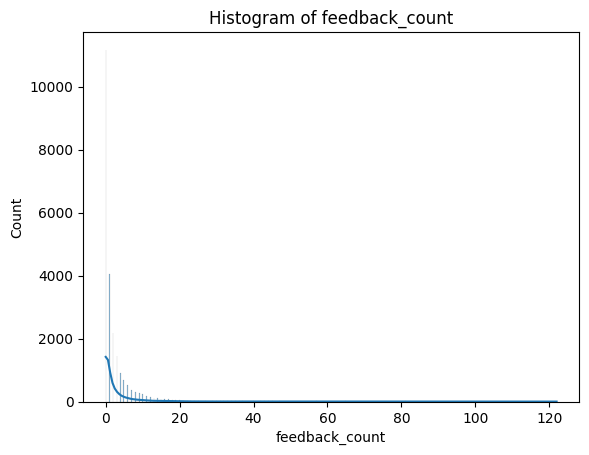

In [ ]:
sns.histplot(df['feedback_count'],kde=True)
plt.xlabel('feedback_count')
plt.ylabel('Count')
plt.title('Histogram of feedback_count')
plt.show()

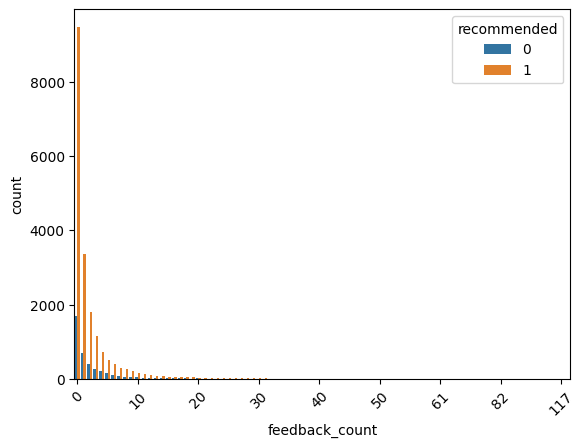

In [ ]:
# Create the countplot
sns.countplot(data=df, x="feedback_count", hue="recommended")

# Show every 10th label on the x-axis
plt.xticks(np.arange(0, len(df["feedback_count"].unique()), step=10), rotation=45)

# Display the plot
plt.show()

**7. Analysis based on division**

In [ ]:
df.division.describe().T

,division
count,23472
unique,3
top,General
freq,13850


<ipython-input-30-fb98ab7d19ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='division', palette='viridis')


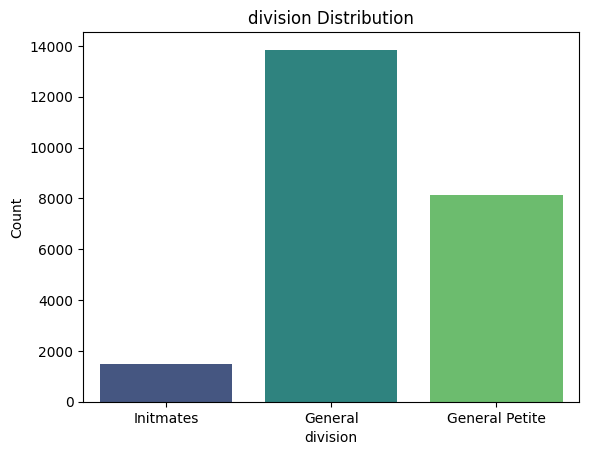

In [ ]:
sns.countplot(data=df, x='division', palette='viridis')
plt.title('division Distribution')
plt.xlabel('division')
plt.ylabel('Count')
plt.show()

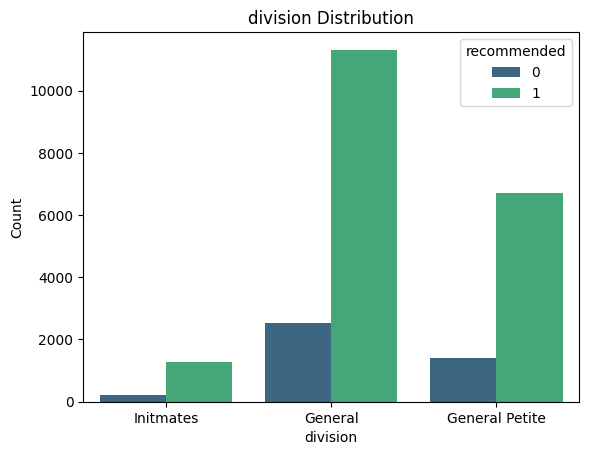

In [ ]:
sns.countplot(data=df, x='division', palette='viridis', hue="recommended")
plt.title('division Distribution')
plt.xlabel('division')
plt.ylabel('Count')
plt.show()

**8.Analysis Based on department**

In [ ]:
df.department.describe().T

,department
count,23472
unique,6
top,Tops
freq,10468


<ipython-input-33-e7b275e70a24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='department', palette='viridis')


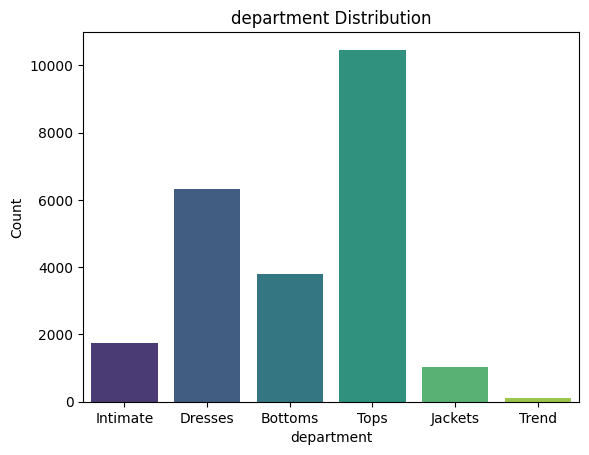

In [ ]:
sns.countplot(data=df, x='department', palette='viridis')
plt.title('department Distribution')
plt.xlabel('department')
plt.ylabel('Count')
plt.show()

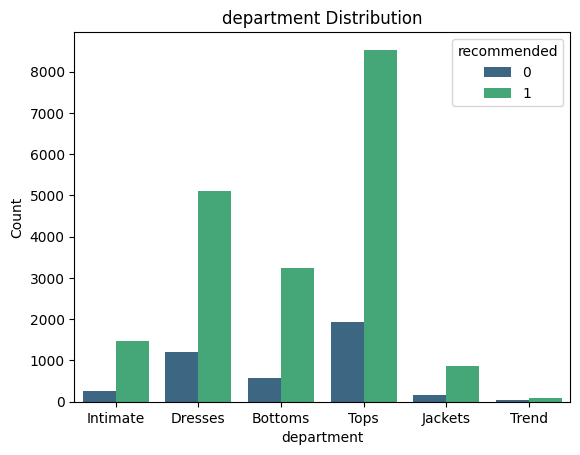

In [ ]:
sns.countplot(data=df, x='department', palette='viridis', hue="recommended")
plt.title('department Distribution')
plt.xlabel('department')
plt.ylabel('Count')
plt.show()

**9. Analysis based on class**

In [ ]:
df["class"].describe().T

,class
count,23472
unique,20
top,Dresses
freq,6319


<ipython-input-36-432c62f064e8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='viridis')


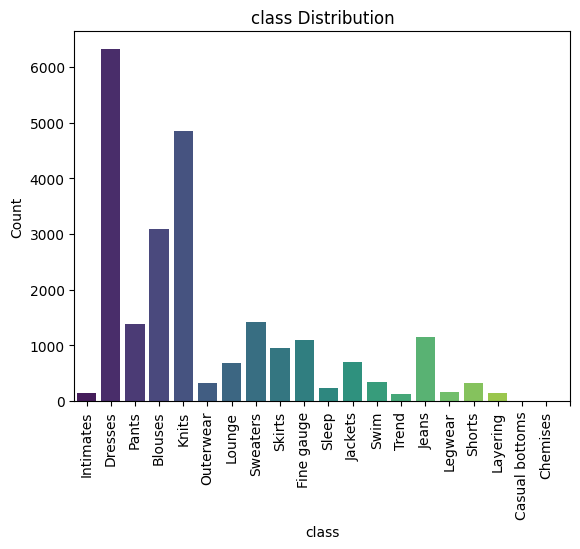

In [ ]:
sns.countplot(data=df, x='class', palette='viridis')
plt.xticks(np.arange(0, len(df["class"].unique())), rotation=90)
plt.title('class Distribution')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

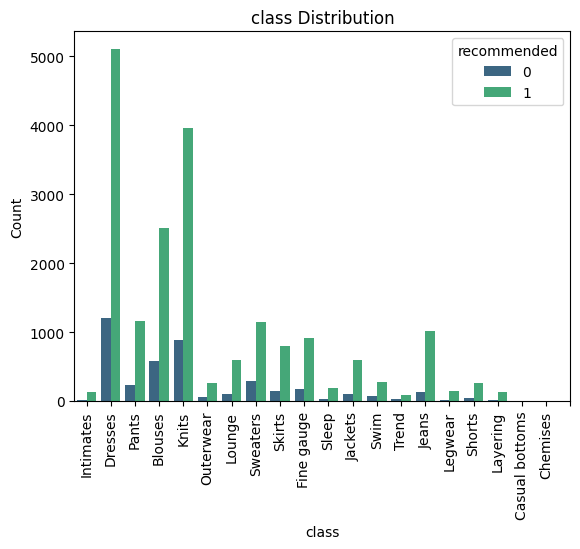

In [ ]:
sns.countplot(data=df, x='class', palette='viridis', hue="recommended")
plt.xticks(np.arange(0, len(df["class"].unique())), rotation=90)
plt.title('class Distribution')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

**10. Analysis based on review_text**

In [ ]:
df.review_text.describe().T

,review_text
count,22641
unique,22634
top,Perfect fit and i've gotten so many compliment...
freq,3


In [ ]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [ ]:
df_ml = df.copy()

In [ ]:
drop_columns = ['age',
                'title',
                'rating',
                'feedback_count',
                'division',
                'department',
                'class']

In [ ]:
df_ml.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
df_ml.rename(columns = {'review_text':'text', 'recommended':'recommend'}, inplace = True)

In [ ]:
df_ml.columns

Index(['text', 'recommend'], dtype='object')

In [ ]:
df_ml.isnull().melt(value_name="missing")

,variable,missing
0,text,False
1,text,False
2,text,False
3,text,False
4,text,False
...,...,...
46967,recommend,False
46968,recommend,False
46969,recommend,False
46970,recommend,False


<Figure size 1000x500 with 0 Axes>

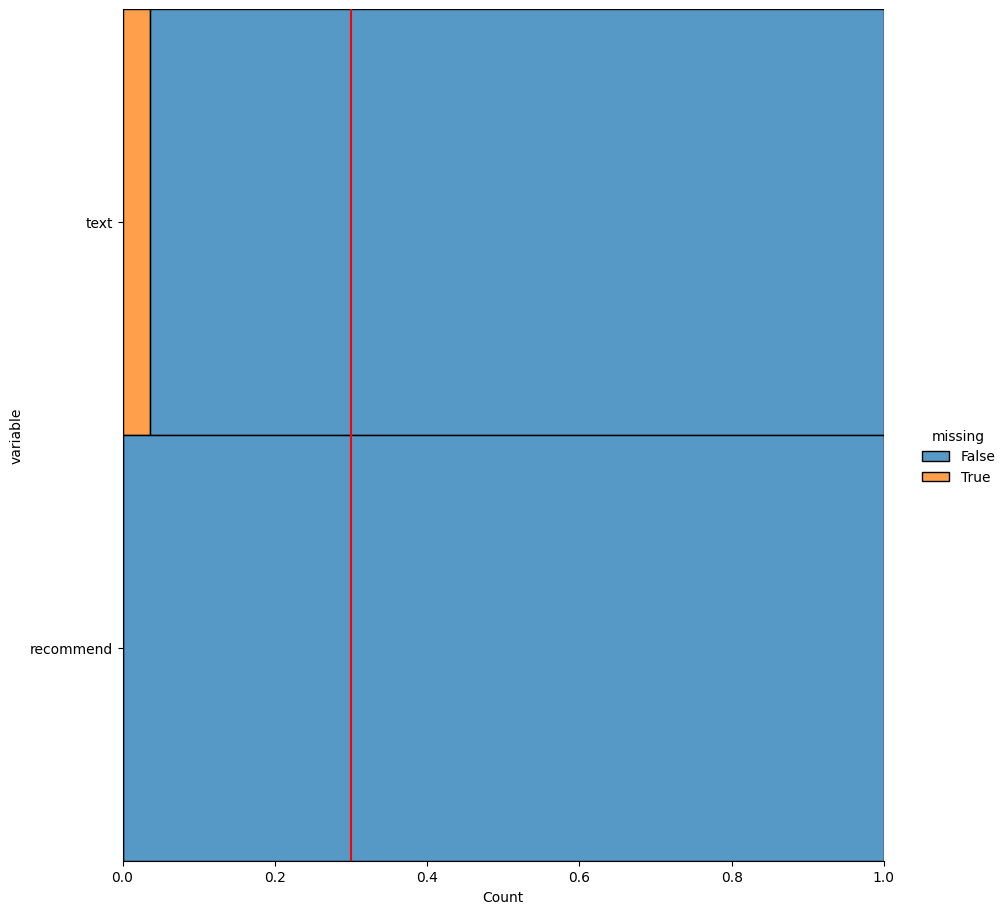

In [ ]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df_ml.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r");

In [ ]:
df_ml = df_ml.dropna()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22641 non-null  object
 1   recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [ ]:
df_ml["text"].str.isspace().sum()
df_ml[df_ml["text"].str.isspace() == True].index

Index([], dtype='int64')

In [ ]:
df_ml.head()

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') # Download punkt for word_tokenize
nltk.download('wordnet') # Download wordnet for WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # Import word_tokenize
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df_ml["text"] = df_ml["text"].apply(cleaning)
df_ml["text"].head()

,text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store im ...
2,high hope dress really wanted work initially o...
3,love love love jumpsuit fun flirty fabulous ev...
4,shirt flattering due adjustable front tie perf...


In [ ]:

" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [ ]:
rare_words = pd.Series(" ".join(df_ml["text"]).split()).value_counts()
rare_words

,count
dress,11352
fit,10128
size,9363
love,8992
top,8281
...,...
lofty,1
homespun,1
proofed,1
integrated,1


In [ ]:
rare_words = rare_words[rare_words <= 2]

In [ ]:
rare_words.index

Index(['scrappy', 'minneapolis', 'conflict', 'poolside', 'parka', 'bec',
       'unfortunatly', 'lycra', 'favorably', 'basketball',
       ...
       'xsma', 'connects', 'liiiiiittle', 'snowflske', 'stratosphere', 'lofty',
       'homespun', 'proofed', 'integrated', 'wildfire'],
      dtype='object', length=6501)

In [ ]:
df_ml["text"] = df_ml["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_ml["text"].head()

,text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store im ...
2,high hope dress really wanted work initially o...
3,love love love jumpsuit fun flirty fabulous ev...
4,shirt flattering due adjustable front tie perf...


In [ ]:
df_ml[df_ml["recommend"] == 0].head(3)

,text,recommend
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one petite foot tall us...,0
10,dress run small esp zipper area run ordered sp...,0


In [ ]:
df_ml[df_ml["recommend"] == 1].head(3)

,text,recommend
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1


**Collect Words (positive and negative separately)**

In [ ]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [ ]:
positive_words =" ".join(df_ml[df_ml["recommend"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [ ]:
negative_words = " ".join(df_ml[df_ml["recommend"] == 0].text).split()
negative_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

In [ ]:
review_text = df_ml["text"]

In [ ]:
all_words = " ".join(review_text)

In [ ]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.9 MB/s eta 0:00:00


 **wordcloud for all words**

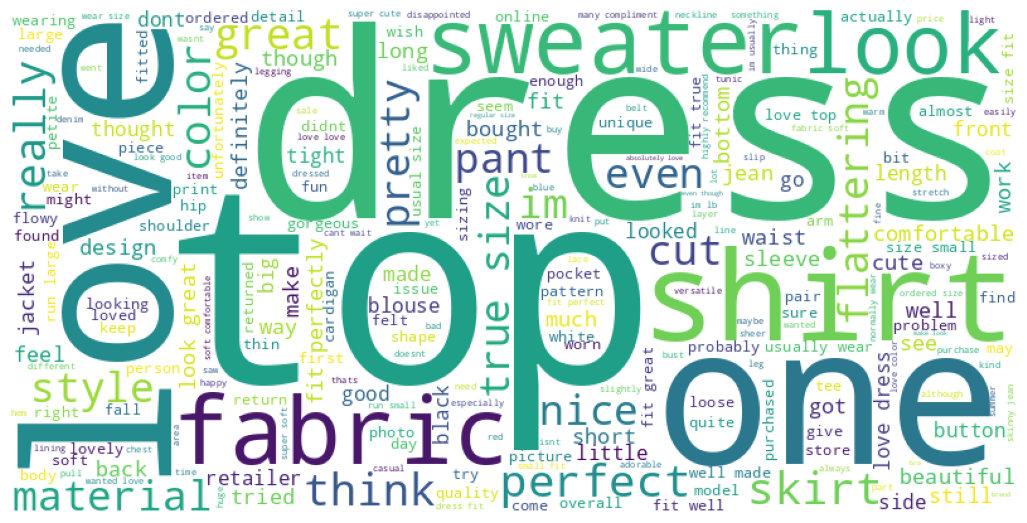

In [ ]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**wordcloud for positive word**

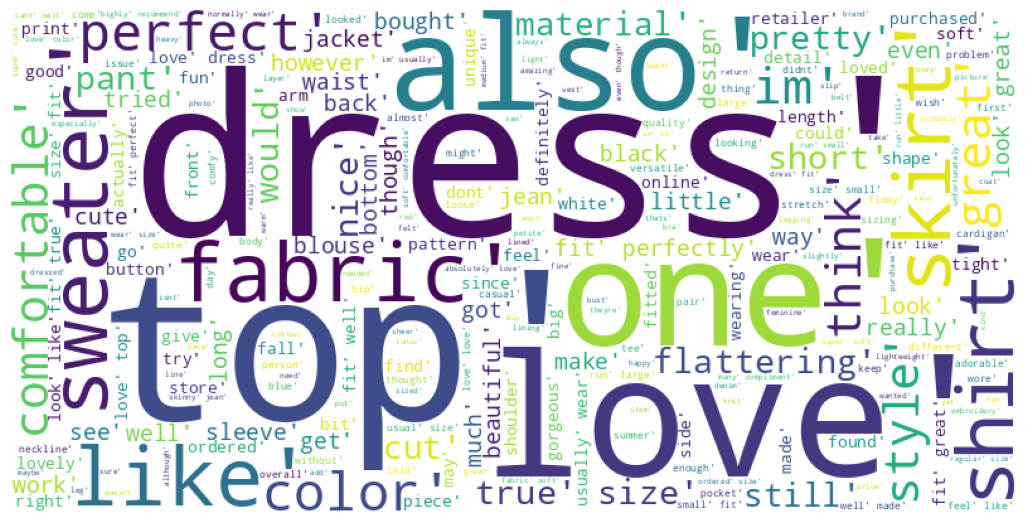

In [ ]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Wordcloud for negative word**

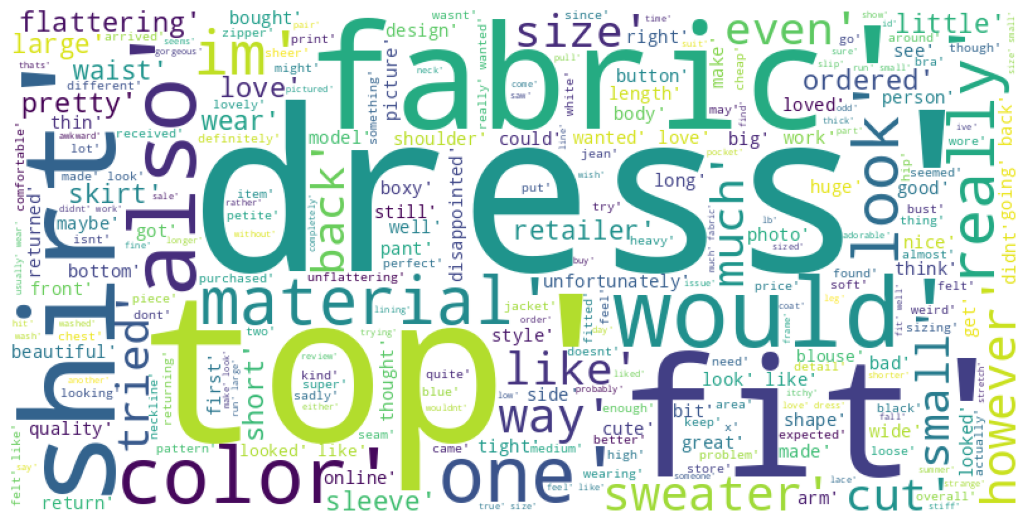

In [ ]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter # Import the Counter object from collections
import nltk
nltk.download('punkt') # Download punkt for word_tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(50)

[('dress', 11352),
 ('fit', 10128),
 ('size', 9363),
 ('love', 8992),
 ('top', 8281),
 ('like', 7036),
 ('color', 6916),
 ('look', 6891),
 ('wear', 6521),
 ('great', 6101),
 ('im', 5968),
 ('would', 5014),
 ('fabric', 4862),
 ('small', 4589),
 ('really', 3924),
 ('ordered', 3835),
 ('little', 3773),
 ('perfect', 3760),
 ('one', 3704),
 ('flattering', 3485),
 ('soft', 3322),
 ('well', 3251),
 ('back', 3186),
 ('comfortable', 3047),
 ('cute', 3030),
 ('nice', 3017),
 ('bought', 2986),
 ('beautiful', 2950),
 ('bit', 2877),
 ('material', 2811),
 ('shirt', 2791),
 ('large', 2791),
 ('much', 2703),
 ('sweater', 2700),
 ('length', 2638),
 ('run', 2631),
 ('jean', 2600),
 ('also', 2583),
 ('work', 2527),
 ('petite', 2430),
 ('got', 2426),
 ('long', 2400),
 ('short', 2361),
 ('waist', 2306),
 ('quality', 2259),
 ('medium', 2233),
 ('skirt', 2220),
 ('think', 2194),
 ('pretty', 2188),
 ('even', 2166)]

**11. Machine learning implementation**

In [ ]:
X = df_ml["text"].values

In [ ]:
y = df_ml["recommend"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

**COUNT VECTORIZATION**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count

<18112x5471 sparse matrix of type '<class 'numpy.int64'>'
	with 459519 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_count

<4529x5471 sparse matrix of type '<class 'numpy.int64'>'
	with 113971 stored elements in Compressed Sparse Row format>

In [ ]:
len(X_train_count.toarray())

18112

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(X_test_count.toarray())

4529

In [ ]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train

array(['beautiful sweater soft lovely color easy wear current photo true length pound ordered regular sm fit hip',
       'surprised low review dress dress obviously loose fitting style bit man quality fabric beautiful pattern stunning find loose flowy style comfortable love boot tights winter also planning wear sandal spring purchased petite small',
       'bought blue love usually wear x small retailer shirt small medium dress ended extra small petite really flattering hide stomach enough highly recommend dress size way',
       ...,
       'sweater came expected adorable others said soft comfy wear everywhere including work love',
       'top flattering im medium build bulky fabric didnt fall right place made look round im definitely going back',
       'top totally adorable one favorite retailer top season wear jean even red skinny pant get ton compliment fit true size material washable durable'],
      dtype=object)

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Modelling**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

    # Create the ConfusionMatrixDisplay object
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot the confusion matrix
    disp.plot(cmap="plasma")
    plt.show()

**Logistic Regression using CountVectorizer**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
y_pred = logreg_count.predict(X_test_count)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
accuracy

0.8688452196952969

In [ ]:
precision

0.9620290714921388

In [ ]:
recall

0.8743596656780803

In [ ]:
f1

0.9161016949152543

LogReg_Count Model
------------------
[[ 692  128]
 [ 466 3243]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.85     18112
weighted avg       0.92      0.89      0.90     18112



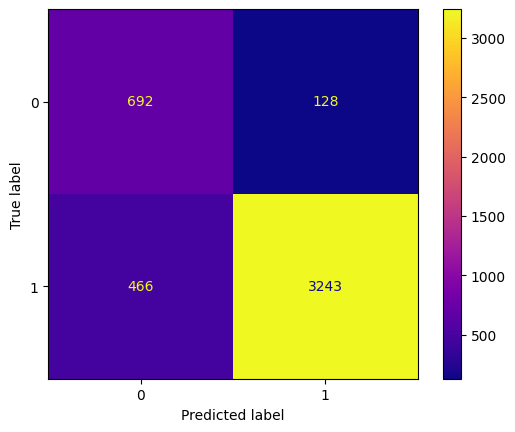

In [ ]:
print("LogReg_Count Model")
print ("------------------")
eval(logreg_count, X_train_count, X_test_count)

**CountVectorizer Cross Validation**

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        log_count_acc = scores
    elif i == "precision":
        log_count_pre = scores
    elif i == "recall":
        log_count_rec = scores
    elif i == "f1":
        log_count_f1 = scores
    print(f" {i:20} score for LogReg_Count : {scores}\n")

 accuracy             score for LogReg_Count : 0.8645642035488302

 precision            score for LogReg_Count : 0.957863290723641

 recall               score for LogReg_Count : 0.8730357801716853

 f1                   score for LogReg_Count : 0.9134570425962301

 precision-0          score for LogReg_Count : 0.5904248125405049

 recall-0             score for LogReg_Count : 0.8262714063310845

 f1-0                 score for LogReg_Count : 0.6885430604469868

 precision-1          score for LogReg_Count : 0.957863290723641

 recall-1             score for LogReg_Count : 0.8730357801716853

 f1-1                 score for LogReg_Count : 0.9134570425962301



**Logistic Regression using TF-IDF**

In [ ]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
y_pred = logreg_tfidf.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
accuracy

0.8856259659969088

In [ ]:
precision

0.9430713690641489

In [ ]:
recall

0.9156106767322728

In [ ]:
f1

0.9291381668946649

LogReg_TFIDF Model
------------------
[[ 702  118]
 [ 467 3242]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.87      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      3281
           1       0.98      0.88      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.84     18112
weighted avg       0.92      0.89      0.90     18112



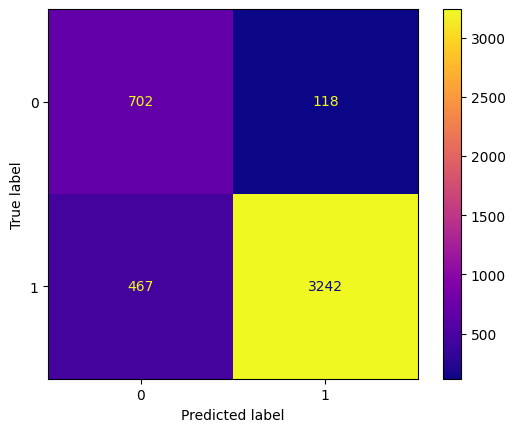

In [ ]:
print("LogReg_TFIDF Model")
print("------------------")
eval(logreg_tfidf, X_train_tf_idf, X_test_tf_idf)

**TF-IDF Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()

    if i == "accuracy":
        log_tfidf_acc = scores
    elif i == "precision":
        log_tfidf_pre = scores
    elif i == "recall":
        log_tfidf_rec = scores
    elif i == "f1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for LogReg_TFIDF : {scores}\n")


 accuracy             score for LogReg_TFIDF : 0.8447432784443363

 precision            score for LogReg_TFIDF : 0.9635009559931424

 recall               score for LogReg_TFIDF : 0.84235722737294

 f1                   score for LogReg_TFIDF : 0.898804210222336

 precision-0          score for LogReg_TFIDF : 0.5460954219655207

 recall-0             score for LogReg_TFIDF : 0.8555313588850174

 f1-0                 score for LogReg_TFIDF : 0.6663867320792833

 precision-1          score for LogReg_TFIDF : 0.9635009559931424

 recall-1             score for LogReg_TFIDF : 0.84235722737294

 f1-1                 score for LogReg_TFIDF : 0.898804210222336



**Naive Bayes Countvectorizer MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nbmulti_count = MultinomialNB()
nbmulti_count.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
y_pred = nbmulti_count.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
accuracy

0.8856259659969088

In [ ]:
precision

0.9406241369787351

In [ ]:
recall

0.9183068212456188

In [ ]:
f1


0.9293315143246931

NBMulti_Count Model
-------------------
[[ 605  215]
 [ 303 3406]]
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.83      0.81      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



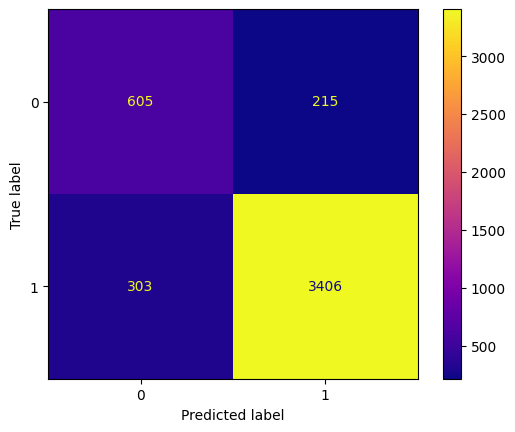

In [ ]:
print("NBMulti_Count Model")
print("-------------------")
eval(nbmulti_count, X_train_count, X_test_count)


**Countvectorize MultinomialNB with Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        nbm_count_acc = scores
    elif i == "precision":
        nbm_count_pre = scores
    elif i == "recall":
        nbm_count_rec = scores
    elif i == "f1:":
        nbm_count_f1 = scores

    print(f" {i:20} score for NBMulti_Count : {scores}\n")

 accuracy             score for NBMulti_Count : 0.8827848090465062

 precision            score for NBMulti_Count : 0.9432577672132181

 recall               score for NBMulti_Count : 0.9117390624744409

 f1                   score for NBMulti_Count : 0.9272116064628054

 precision-0          score for NBMulti_Count : 0.6535053662851457

 recall-0             score for NBMulti_Count : 0.7519117429016235

 f1-0                 score for NBMulti_Count : 0.6990573023026432

 precision-1          score for NBMulti_Count : 0.9432577672132181

 recall-1             score for NBMulti_Count : 0.9117390624744409

 f1-1                 score for NBMulti_Count : 0.9272116064628054



**Countvectorize BernoulliNB**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
nbberno_count = BernoulliNB()
nbberno_count.fit(X_train_count,y_train)

BernoulliNB()

In [ ]:
y_pred = nbberno_count.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
accuracy

0.8812099801280636

In [ ]:
precision

0.9352182267362065

In [ ]:
recall

0.9185764356969534

In [ ]:
f1

0.926822633297062

NBBerno_Count Model
-------------------
[[ 584  236]
 [ 302 3407]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      3281
           1       0.95      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



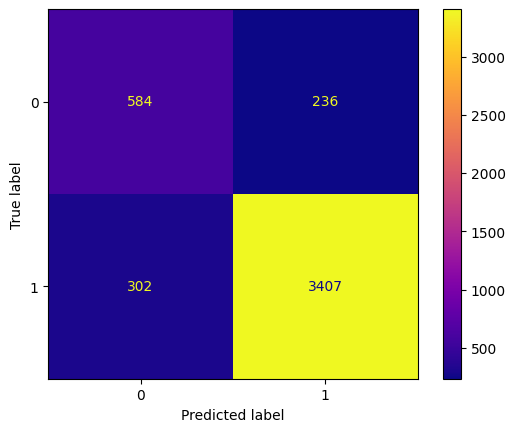

In [ ]:
print("NBBerno_Count Model")
print("-------------------")
eval(nbberno_count, X_train_count, X_test_count)

**Countvectorize BernoulliNB with Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        nbberno_count_acc = scores
    elif i == "precision":
        nbberno_count_pre = scores
    elif i == "recall":
        nbberno_count_rec = scores
    elif i == "f1":
        nbberno_count_f1 = scores

    print(f" {i:20} score for NBBerno_Count : {scores}\n")

 accuracy             score for NBBerno_Count : 0.8772088463559093

 precision            score for NBBerno_Count : 0.9372085625457928

 recall               score for NBBerno_Count : 0.9111324117173428

 f1                   score for NBBerno_Count : 0.9239641491593383

 precision-0          score for NBBerno_Count : 0.6433374514752088

 recall-0             score for NBBerno_Count : 0.7238759359478093

 f1-0                 score for NBBerno_Count : 0.6809795527114034

 precision-1          score for NBBerno_Count : 0.9372085625457928

 recall-1             score for NBBerno_Count : 0.9111324117173428

 f1-1                 score for NBBerno_Count : 0.9239641491593383



**TF-IDF MultinomialNB**

In [ ]:
nbmulti_tfidf = MultinomialNB()
nbmulti_tfidf.fit(X_train_tf_idf,y_train)

MultinomialNB()

NBMulti_TFIDF MODEL
-------------------
[[ 135  685]
 [  20 3689]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.16      0.28       820
           1       0.84      0.99      0.91      3709

    accuracy                           0.84      4529
   macro avg       0.86      0.58      0.59      4529
weighted avg       0.85      0.84      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.23      0.37      3281
           1       0.85      1.00      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.90      0.61      0.65     18112
weighted avg       0.87      0.86      0.82     18112



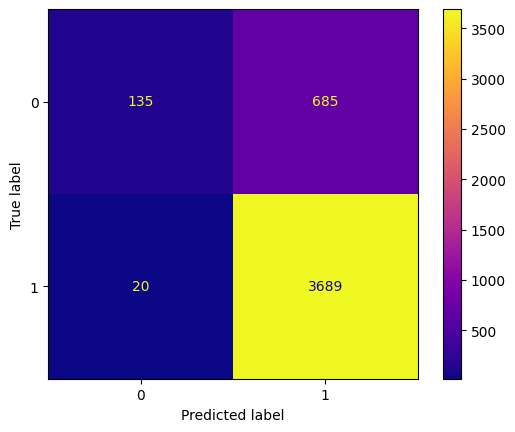

In [ ]:
print("NBMulti_TFIDF MODEL")
print("-------------------")
eval(nbmulti_tfidf, X_train_tf_idf, X_test_tf_idf)

**TF-IDF MultinomialNB with Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),

                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        nbm_tfidf_acc = scores
    elif i == "precision":
        nbm_tfidf_pre = scores
    elif i == "recall":
        nbm_tfidf_rec = scores
    elif i == "f1":
        nbm_tfidf_f1 = scores

    print(f" {i:20} score for NBMulti_TFIDF : {scores}\n")

 accuracy             score for NBMulti_TFIDF : 0.8452409118667745

 precision            score for NBMulti_TFIDF : 0.8430064913170012

 recall               score for NBMulti_TFIDF : 0.9966288193415765

 f1                   score for NBMulti_TFIDF : 0.913398289029748

 precision-0          score for NBMulti_TFIDF : 0.914491662712544

 recall-0             score for NBMulti_TFIDF : 0.1609283490251316

 f1-0                 score for NBMulti_TFIDF : 0.272994496139569

 precision-1          score for NBMulti_TFIDF : 0.8430064913170012

 recall-1             score for NBMulti_TFIDF : 0.9966288193415765

 f1-1                 score for NBMulti_TFIDF : 0.913398289029748



**TF-IDF BernoulliNB**

In [ ]:
nbberno_tfidf = BernoulliNB()
nbberno_tfidf.fit(X_train_tf_idf,y_train)

BernoulliNB()

NBBerno_TFIDF MODEL
-------------------
[[ 584  236]
 [ 302 3407]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      3281
           1       0.95      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



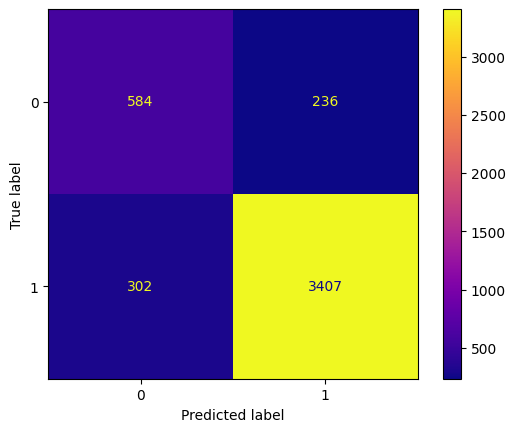

In [ ]:
print("NBBerno_TFIDF MODEL")
print("-------------------")
eval(nbberno_tfidf, X_train_tf_idf, X_test_tf_idf)

**TF-IDF BernoulliNB with Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        nbberno_tfidf_acc = scores
    elif i == "precision":
        nbberno_tfidf_pre = scores
    elif i == "recall":
        nbberno_tfidf_rec = scores
    elif i == "f1":
        nbberno_tfidf_f1 = scores
    print(f" {i:20} score for NBBerno_TFIDF : {scores}\n")



 accuracy             score for NBBerno_TFIDF : 0.8772088463559093

 precision            score for NBBerno_TFIDF : 0.9372085625457928

 recall               score for NBBerno_TFIDF : 0.9111324117173428

 f1                   score for NBBerno_TFIDF : 0.9239641491593383

 precision-0          score for NBBerno_TFIDF : 0.6433374514752088

 recall-0             score for NBBerno_TFIDF : 0.7238759359478093

 f1-0                 score for NBBerno_TFIDF : 0.6809795527114034

 precision-1          score for NBBerno_TFIDF : 0.9372085625457928

 recall-1             score for NBBerno_TFIDF : 0.9111324117173428

 f1-1                 score for NBBerno_TFIDF : 0.9239641491593383



**Support Vector Machine (SVM) Countvectorizer**

In [ ]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_count.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC_Count Model
---------------
[[ 690  130]
 [ 464 3245]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



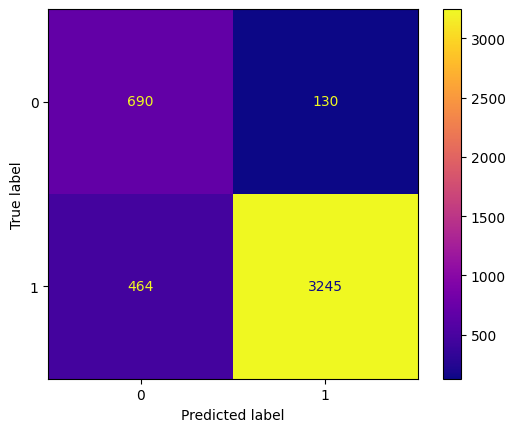

In [ ]:
print("SVC_Count Model")
print("---------------")
eval(svc_count, X_train_count, X_test_count)

CountVectorizer With Cross Validation

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        svc_count_acc = scores
    elif i == "precision":
        svc_count_pre = scores
    elif i == "recall":
        svc_count_rec = scores
    elif i == "f1":
        svc_count_f1 = scores
    print(f" {i:20} score for SVC_Count : {scores}\n")


 accuracy             score for SVC_Count : 0.8647299797777379

 precision            score for SVC_Count : 0.958747786478464

 recall               score for SVC_Count : 0.8723616076540412

 f1                   score for SVC_Count : 0.9134898373809263

 precision-0          score for SVC_Count : 0.5903560706228463

 recall-0             score for SVC_Count : 0.8302338942842316

 f1-0                 score for SVC_Count : 0.6898706437632102

 precision-1          score for SVC_Count : 0.958747786478464

 recall-1             score for SVC_Count : 0.8723616076540412

 f1-1                 score for SVC_Count : 0.9134898373809263



**Support Vector Machine (SVM) TF-IDF**

In [ ]:
svc_tf_idf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC_TFIDF Model
---------------
[[ 711  109]
 [ 582 3127]]
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.87      0.67       820
           1       0.97      0.84      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



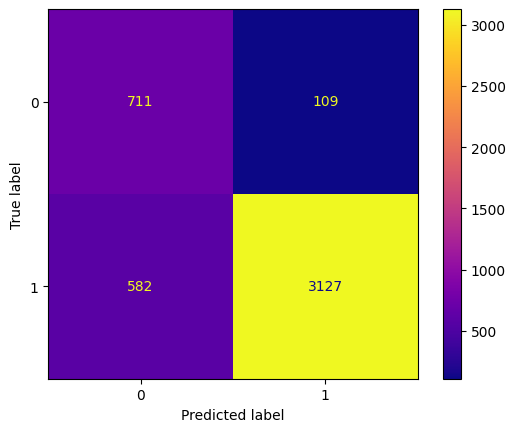

In [ ]:
print("SVC_TFIDF Model")
print("---------------")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

**svm TFIDF With Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),

                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        svc_tfidf_acc = scores
    elif i == "precision":
        svc_tfidf_pre = scores
    elif i == "recall":
        svc_tfidf_rec = scores
    elif i == "f1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for SVC_TFIDF : {scores}\n")

 accuracy             score for SVC_TFIDF : 0.843307729438567

 precision            score for SVC_TFIDF : 0.9642834970157341

 recall               score for SVC_TFIDF : 0.8397949901216482

 f1                   score for SVC_TFIDF : 0.8976851450324871

 precision-0          score for SVC_TFIDF : 0.5431349609517813

 recall-0             score for SVC_TFIDF : 0.8591898954703833

 f1-0                 score for SVC_TFIDF : 0.6652954800075591

 precision-1          score for SVC_TFIDF : 0.9642834970157341

 recall-1             score for SVC_TFIDF : 0.8397949901216482

 f1-1                 score for SVC_TFIDF : 0.8976851450324871



**Random Forest
CountVectorizer**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_count = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_count.fit(X_train_count, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

RF_Count Model
--------------
[[ 657  163]
 [ 570 3139]]
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.80      0.64       820
           1       0.95      0.85      0.90      3709

    accuracy                           0.84      4529
   macro avg       0.74      0.82      0.77      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.89      0.72      3281
           1       0.97      0.87      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



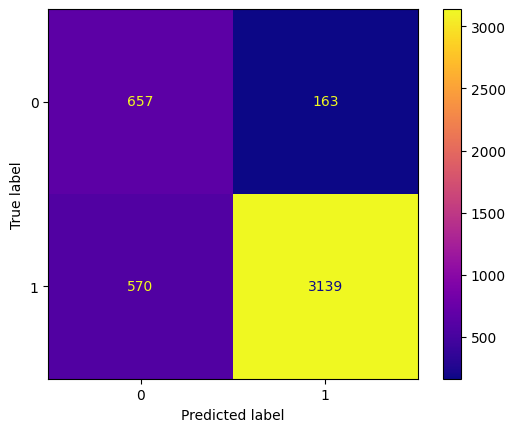

In [ ]:
print("RF_Count Model")
print("--------------")
eval(rf_count, X_train_count, X_test_count)

**CountVectorizer with Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        rf_count_acc = scores
    elif i == "precision":
        rf_count_pre = scores
    elif i == "recall":
        rf_count_rec = scores
    elif i == "f1":
        rf_count_f1 = scores
    print(f" {i:20} score for RF_Count : {scores}\n")

 accuracy             score for RF_Count : 0.846067995070595

 precision            score for RF_Count : 0.9491537775348018

 recall               score for RF_Count : 0.8579989658174496

 f1                   score for RF_Count : 0.9011808430789919

 precision-0          score for RF_Count : 0.5538639730721077

 recall-0             score for RF_Count : 0.7921343316776632

 f1-0                 score for RF_Count : 0.6514056190123962

 precision-1          score for RF_Count : 0.9491537775348018

 recall-1             score for RF_Count : 0.8579989658174496

 f1-1                 score for RF_Count : 0.9011808430789919



**TF-IDF**

In [ ]:
rf_tf_idf = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

RF_TFIDF Model
--------------
[[ 658  162]
 [ 599 3110]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.80      0.63       820
           1       0.95      0.84      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.91      0.72      3281
           1       0.98      0.86      0.91     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



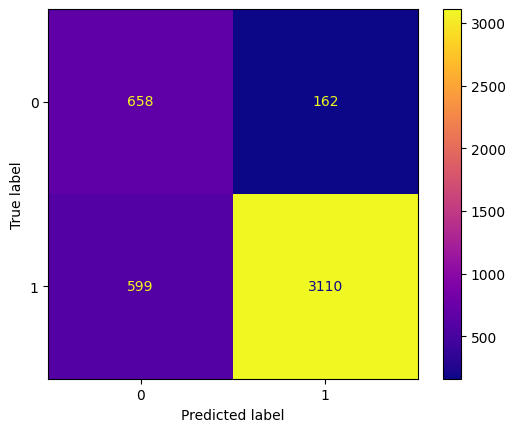

In [ ]:
print("RF_TFIDF Model")
print("--------------")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

**TF-IDF with Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        rf_tfidf_acc = scores
    elif i == "precision":
        rf_tfidf_pre = scores
    elif i == "recall":
        rf_tfidf_rec = scores
    elif i == "f1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for RF_TFIDF : {scores}\n")

 accuracy             score for RF_TFIDF : 0.8387248090221273

 precision            score for RF_TFIDF : 0.947239989405331

 recall               score for RF_TFIDF : 0.8504474793390683

 f1                   score for RF_TFIDF : 0.8961763375144626

 precision-0          score for RF_TFIDF : 0.5382639014472383

 recall-0             score for RF_TFIDF : 0.7857365260582697

 f1-0                 score for RF_TFIDF : 0.6385586056947963

 precision-1          score for RF_TFIDF : 0.947239989405331

 recall-1             score for RF_TFIDF : 0.8504474793390683

 f1-1                 score for RF_TFIDF : 0.8961763375144626



**Ada Boosting
CountVectorizer**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_count.fit(X_train_count, y_train)


AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_Count Model
---------------
[[ 316  504]
 [  82 3627]]
Test_Set
              precision    recall  f1-score   support

           0       0.79      0.39      0.52       820
           1       0.88      0.98      0.93      3709

    accuracy                           0.87      4529
   macro avg       0.84      0.68      0.72      4529
weighted avg       0.86      0.87      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.76      0.37      0.50      3281
           1       0.88      0.97      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.82      0.67      0.71     18112
weighted avg       0.85      0.86      0.85     18112



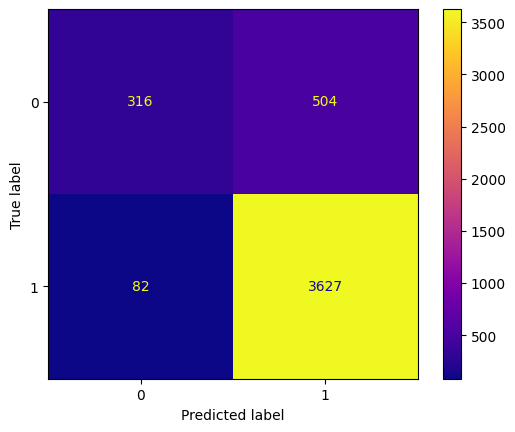

In [ ]:
print("Ada_Count Model")
print("---------------")
eval(ada_count, X_train_count, X_test_count)

**CountVectorizer with Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        ada_count_acc = scores
    elif i == "precision":
        ada_count_pre = scores
    elif i == "recall":
        ada_count_rec = scores
    elif i == "f1":
        ada_count_f1 = scores
    print(f" {i:20} score for Ada_Count : {scores}\n")

 accuracy             score for Ada_Count : 0.860920570026439

 precision            score for Ada_Count : 0.8719876213774118

 recall               score for Ada_Count : 0.9730293733289954

 f1                   score for Ada_Count : 0.9197294960707598

 precision-0          score for Ada_Count : 0.7448149729844051

 recall-0             score for Ada_Count : 0.3541543109200089

 f1-0                 score for Ada_Count : 0.479458497779078

 precision-1          score for Ada_Count : 0.8719876213774118

 recall-1             score for Ada_Count : 0.9730293733289954

 f1-1                 score for Ada_Count : 0.9197294960707598



**TF-IDF**

In [ ]:
ada_tf_idf = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_TFIDF Model
---------------
[[ 285  535]
 [  81 3628]]
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.35      0.48       820
           1       0.87      0.98      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.83      0.66      0.70      4529
weighted avg       0.85      0.86      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.77      0.34      0.47      3281
           1       0.87      0.98      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.82      0.66      0.70     18112
weighted avg       0.85      0.86      0.84     18112



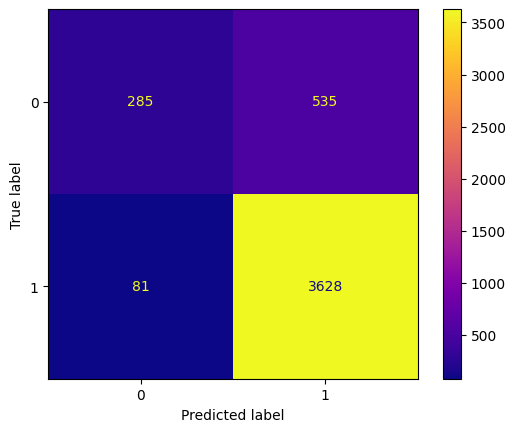

In [ ]:
print("Ada_TFIDF Model")
print("---------------")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

**TF-IDF with Cross Validation**

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "accuracy":
        ada_tfidf_acc = scores
    elif i == "precision":
        ada_tfidf_pre = scores
    elif i == "recall":
        ada_tfidf_rec = scores
    elif i == "f1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for Ada_TFIDF : {scores}\n")

 accuracy             score for Ada_TFIDF : 0.8564486953045101

 precision            score for Ada_TFIDF : 0.8662823698529614

 recall               score for Ada_TFIDF : 0.9752543198477627

 f1                   score for Ada_TFIDF : 0.9175330285421953

 precision-0          score for Ada_TFIDF : 0.7421792350533748

 recall-0             score for Ada_TFIDF : 0.319413966936022

 f1-0                 score for Ada_TFIDF : 0.4459638630351693



**Compare Models F1 Scores, Recall Scores and Average Precision Score**

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes(Multi)_Count", "NaiveBayes(Berno)_Count", "LogReg_Count", "SVM_Count",
                                  "Random Forest_Count", "AdaBoost_Count", "NaiveBayes(Multi)_TFIDF",
                                  "NaiveBayes(Berno)_TFIDF", "LogReg_TFIDF", "SVM_TFIDF", "Random Forest_TFIDF",
                                  "AdaBoost_TFIDF"],

                        "accuracy": [nbm_count_acc, nbb_count_acc, log_count_acc, svc_count_acc, rf_count_acc, ada_count_acc,
                                    nbm_tfidf_acc, nbb_tfidf_acc, log_tfidf_acc, svc_tfidf_acc, rf_tfidf_acc, ada_tfidf_acc],

                        "F1_Score": [nbm_count_f1, nbb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1,
                                    nbm_tfidf_f1, nbb_tfidf_f1, log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1],

                        "Recall_Score": [nbm_count_rec, nbb_count_rec, log_count_rec, svc_count_rec, rf_count_rec,
                                         ada_count_rec, nbm_tfidf_rec, nbb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec,
                                         rf_tfidf_rec, ada_tfidf_rec],

                        "Precision": [nbm_count_pre, nbb_count_pre, log_count_pre, svc_count_pre, rf_count_pre, ada_count_pre,
                                    nbm_tfidf_pre, nbb_tfidf_pre, log_tfidf_pre, svc_tfidf_pre, rf_tfidf_pre, ada_tfidf_pre]})

compare = compare.sort_values(by="accuracy", ascending=True)
fig = px.bar(compare, x = "accuracy", y = "Model", title = "accuracy")
fig.show()

compare = compare.sort_values(by="Precision", ascending=True)
fig = px.bar(compare, x = "Precision", y = "Model", title = "Precision")
fig.show()

compare = compare.sort_values(by="Recall_Score", ascending=True)
fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")
fig.show()

compare = compare.sort_values(by="F1_Score", ascending=True)
fig = px.bar(compare, x = "F1_Score", y = "Model", title = "F1_Score")
fig.show()


